In [1]:
from langgraph.graph import StateGraph,START,END
from langchain_core.messages import HumanMessage,SystemMessage
from langchain_google_genai import ChatGoogleGenerativeAI  
import os
from dotenv import load_dotenv
from typing import TypedDict,Annotated
from langgraph.checkpoint.memory import MemorySaver

In [2]:
load_dotenv()

True

In [3]:
def create_llm():
    api_key=os.getenv("GOOGLE_API_KEY")

    llm=ChatGoogleGenerativeAI(model="gemini-2.5-flash",
                               api_key=api_key)
    
    return llm

In [4]:
llm=create_llm()

In [5]:
from langgraph.graph.message import add_messages

In [6]:
class ChatBot(TypedDict):

    message:Annotated[list[HumanMessage],add_messages]

In [7]:
def chat_bot(state:ChatBot):

    # message from state
    messages=state["message"]

    # pass to llm
    response=llm.invoke(messages)

    # append to state
    return {"message":[response]}

In [8]:
checkpoint=MemorySaver()

In [9]:
graph=StateGraph(ChatBot)

graph.add_node("Chat_bot",chat_bot)

graph.add_edge(START,"Chat_bot")
graph.add_edge("Chat_bot",END)

workflow=graph.compile(checkpointer=checkpoint)

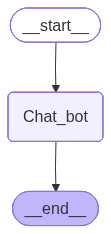

In [10]:
workflow

In [11]:
initial_state={
    "message":[HumanMessage(content="what is capital of India")]
}

workflow.invoke(initial_state)['message'][-1].content

ValueError: Checkpointer requires one or more of the following 'configurable' keys: thread_id, checkpoint_ns, checkpoint_id

In [12]:
thread_id='1'

while True:
    user_input=input("You: ")
    print(user_input)

    if user_input.strip().lower() in ['bye','quit','exit']:
        print("Bot:Thank you for chatting. Goodbye!")
        break
    else:
        config={'configurable':{'thread_id': thread_id}}
        
        result=workflow.invoke({"message":[HumanMessage(content=user_input)]},config=config)['message'][-1].content
        print("Bot :",result)

Hello
Bot : Hello! How can I help you today?
Bye
Bot:Thank you for chatting. Goodbye!


In [53]:
workflow.get_state(config=config)

StateSnapshot(values={'message': [HumanMessage(content='my name is karan', additional_kwargs={}, response_metadata={}, id='9182b0ee-ece6-4713-be4c-e0933c000eb6'), AIMessage(content='Hi Karan! Nice to meet you.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--c7261a01-77fa-4edc-8dec-b7a0a5ced71d-0'), HumanMessage(content='what is my name', additional_kwargs={}, response_metadata={}, id='36c37f86-b47f-4f23-8a1f-52dbc3a20256'), AIMessage(content='Your name is Karan.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--36a2d2e5-8639-46e1-bba1-f896e789509a-0'), HumanMessage(content='my name is kara', additional_kwargs={}, response_metadata={}, id='5be38338-8800-41d8-82d8-e1d24d5b67bb'), AIMessage(content='